# **Time Series and Autocorrelation**

In [10]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [11]:
# Download datasets
m4_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. goog_eur_10.csv", delimiter="\t")
dxyr_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. dxy_r_data.csv", delimiter="\t")
m4_data = m4_data.loc[:, ["Date", "Year", "GOOGLE", "Volume", "EURUSD", "UST10Y"]]
print(m4_data)

            Date  Year       GOOGLE   Volume    EURUSD  UST10Y
0       1/4/2016  2016   741.840027  3272800  1.085399   2.245
1       1/5/2016  2016   742.580017  1950700  1.082755   2.248
2       1/6/2016  2016   743.619995  1947000  1.075199   2.177
3       1/7/2016  2016   726.390015  2963700  1.077900   2.153
4       1/8/2016  2016   714.469971  2450900  1.092598   2.130
...          ...   ...          ...      ...       ...     ...
1500  12/23/2021  2021  2942.850098   690900  1.132888   1.493
1501  12/27/2021  2021  2961.280029   662800  1.132426   1.481
1502  12/28/2021  2021  2928.959961   931200  1.133003   1.481
1503  12/29/2021  2021  2930.090088   851100  1.131478   1.543
1504  12/30/2021  2021  2920.050049   648900  1.136015   1.515

[1505 rows x 6 columns]


In [12]:
# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns and setting index
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
ust10 = m4_data.loc[:, ["Date2", "UST10Y"]].set_index("Date2")
dxy = dxyr_data[["Date2", "DXY_R"]].set_index("Date2")

print(goog.head())
print(ust10.head())
print(dxy.head())

                GOOGLE
Date2                 
2016-01-04  741.840027
2016-01-05  742.580017
2016-01-06  743.619995
2016-01-07  726.390015
2016-01-08  714.469971
            UST10Y
Date2             
2016-01-04   2.245
2016-01-05   2.248
2016-01-06   2.177
2016-01-07   2.153
2016-01-08   2.130
               DXY_R
Date2               
2016-01-05  0.005361
2016-01-06 -0.002213
2016-01-07 -0.009679
2016-01-08  0.003258
2016-01-11  0.001928


**Figure 2: Google Stock Price Daily Close Time Series Daily Chart**

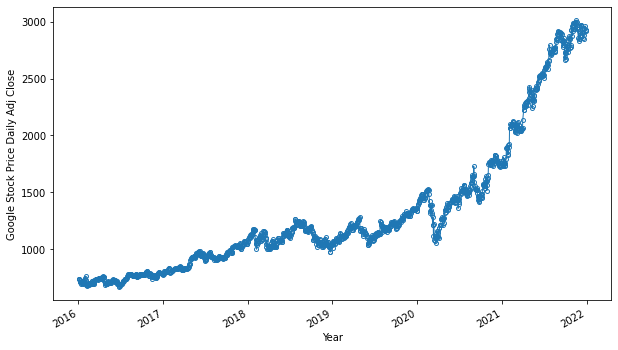

In [13]:
# Plot Google price time series chart
goog["GOOGLE"].plot(
    marker="o",
    markersize=4,
    markerfacecolor="none",
    linestyle="-",
    linewidth=1,
    xlabel="Year",
    ylabel="Google Stock Price Daily Adj Close",
    figsize=(10, 6)
)
plt.show()

**Figure 3: U.S. 10-Year Treasury Bond Yield Time Series Daily Chart**

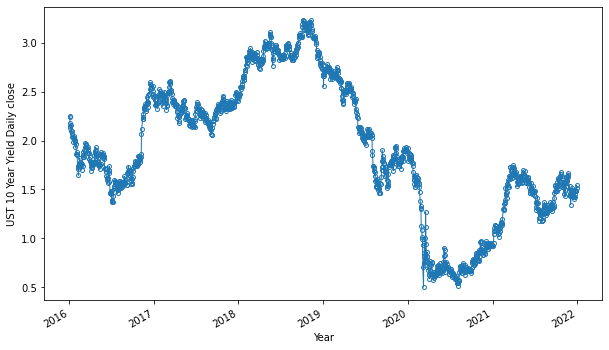

In [14]:
# Plot UST10Y time series chart
ust10["UST10Y"].plot(
    marker="o",
    markersize=4,
    markerfacecolor="none",
    linestyle="-",
    linewidth=1,
    xlabel="Year",
    ylabel="UST 10 Year Yield Daily close",
    figsize=(10, 6)
)
plt.show()

In figure 3, there doesn't seem to be a clear pattern for the U.S. 10-year Treasury Bond yield. However, we can see that if the yield in one day is going down, it would keep going down the next day. It looks like the yield movement from the previous few days can predict where the yield would go today.

From the last three figures we have noticed several patterns:

> * trend <br>
> * cyclical movement (seasonality) <br>
> * volatility clusters (volatilities can be different during different time periods) <br>
> * correlation between observations <br>
> * extreme values or outliers <br>

These are some characteristics of time series data that we will address later in the course.

Since we would like to apply statistics to analyze time series data, we need to define time series data in a mathematical way. 

### **2.2 Time Series Definition**

The data series $ \{ x_1, x_2,\cdots ,x_{t-1}, x_t \}$ is called a time series if 

> a. $t$ is an ordered time stamp (date, hour, year, etc.) <br>
> b. $x_{t}$ is an observation of a random variable $X_{t}$ <br>

Let's use the following table to explain this definition.


**Figure 4: Time Series Definition Example**

| Date | Price: <br>Observed Data | Associated <br>Random Variable |
| :---: | :---:   | :---:   |
| day 1 | $$x_1$$ | $$X_1$$ |
| day 2 | $$x_2$$ | $$X_2$$ |
| day 3 | $$x_3$$ | $$X_3$$ |
| day 4 | $$x_4$$ | $$X_4$$ |
| day 5 | $$x_5$$ | $$X_5$$ |

## **3. Autocorrelation**

In Module 2 Lesson 1, we discussed how one of the assumptions for OLS regression is that each observation should be independent of each other. If the data violates this assumption, this data series has **autocorrelation**. In our last section, we saw U.S. 10-Year Treasury bond yields have an autocorrelation issue because today's bond yield is likely to go down if the yields over the past few days have been inclining. The issue of correlated observations is one challenge in analyzing time series data. We cannot apply time series data to OLS properly without addressing the issue of autocorrelation. So how do we analyze the autocorrelation for a time series? We will introduce the autocorrelation function as a measure in this section. Before getting into autocorrelation function, we would like to introduce some concepts here.

## Lag in Time Series

Check tablet for Lesson Notes

### **3.2 Autocovariance Function**

The first metric we can use to study the strength of the relationship between two observations in a time series is **autocovariance function**. Autocovariance function measures the linear dependence of two observations. Autocovariance function plays a similar role to covariance for two data series, except that autocovariance function assesses the relationship among observations in one data series.

Assume $X_t$ has finite variance where $t = 1, 2, \cdots, T$, autocorrelation function is defined as:

$$ \gamma_{_{X}}(s,t) = cov(X_{s}, X_{t}) = E[ (X_{s}-\mu_{_{X_{s}}})(X_{t}-\mu_{_{X_{t}}}) ] \ $$  

for all $s$ and $t$



Here are some properties for autocovariance function:

> a. It only measures the linear relationship between $X_{s}$ and $X_{t}$ <br>
> b. $\gamma_{_{X}}(s,t) = \gamma_{_{X}}(t,s) $ <br>
> c. When $\gamma_{_{X}}(s,t)$ is close to $0$ and the distance between $s$ and $t$ is large, the time series graph would exhibit a choppy curve between $s$ and $t$ <br>
> d. When the absolute value of $\gamma_{_{X}}(s,t)$ is large and the distance between $s$ and $t$ is large, the time series graph would exhibit a smooth curve between $s$ and $t$ <br>
> e. When $s = t$, the autocovariance becomes variance of $X_t$ <br>


## Check tablet for more lesson notes !!

**Figure 8: ACF Plots for Google Stock Price, U.S. Treasury 10-Year Bond Yield and U.S. Dollar Index Daily Return**


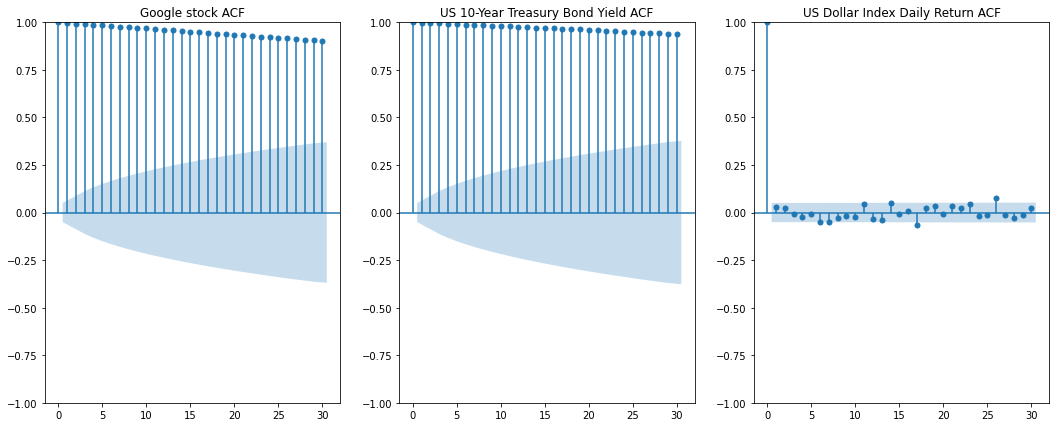

In [15]:
# ACF Plots for GOOGLE, U.S. UST10Y and DXY_R
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sm.graphics.tsa.plot_acf(goog["GOOGLE"], title="Google stock ACF", lags=30, ax=ax[0])
sm.graphics.tsa.plot_acf(ust10["UST10Y"], title="US 10-Year Treasury Bond Yield ACF", lags=30, ax=ax[1])
sm.graphics.tsa.plot_acf(dxy["DXY_R"], title="US Dollar Index Daily Return ACF", lags=30, ax=ax[2])
plt.show()

An ACF plot is a plot that shows a bar as the autocorrelation of a time series with different lags. You have 0 lag starting on the left end of the plot. Since autocorrelation with 0 lag is just correlation to itself, the number is 1. Then, you have autocorrelation with lag 1, lag 2, and so on and so forth. In the plot, we also have 95% confidence intervals as shaded area around $0$. If a bar is over the confidence interval, it means this autocorrelation is statistically significant.

In figure 8, we can see that Google stock and U.S. Treasury 10-year bond yield have high and slowly declining autocorrelations, which usually means there is some sort of trend in the time series. It also means these time series are not stationary. We will usually proceed to detrend the time series to make it stationary before modeling. We will show how to detrend for a time series in the next lesson for the U.S. dollar index daily return.

We see from ACF for the U.S. dollar index daily return, lag 17 and lag26 have significant autocorrelations. This piece of information will help us later to specify a time series model.

Now let's look at PACF plots for Google stock price, U.S. 10-year Treasury bond yield, and dollar index daily return.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

**Figure 9: PACF Plots for Google Stock Price, U.S. Treasury 10-Year Bond Yield, and U.S. Dollar Index Daily Return**


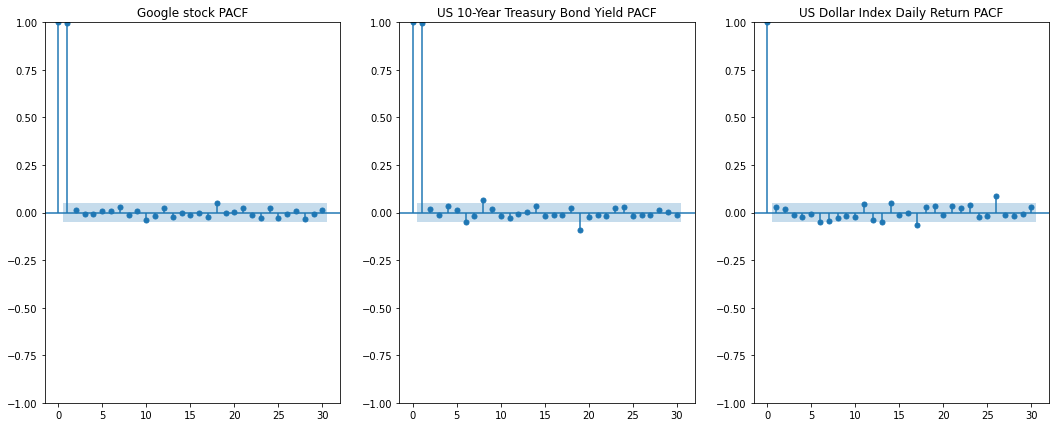

In [16]:
# PACF plots for GOOGLE, U.S. UST10Y and DXY_R
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sm.graphics.tsa.plot_pacf(goog["GOOGLE"], title="Google stock PACF", lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(
    ust10["UST10Y"], title="US 10-Year Treasury Bond Yield PACF", lags=30, ax=ax[1]
)
sm.graphics.tsa.plot_pacf(
    dxy["DXY_R"], title="US Dollar Index Daily Return PACF", lags=30, ax=ax[2]
)
plt.show()

You read PACF plots as you read ACF plots except the bar now represents PACF. From figure 9, we see that for Google stock PACF lag18 is positive and significant. For U.S. Treasury 10-year bond yield, PACF lag8 and lag19 are significant. PACF lag 19 has a negative PACF. For U.S. dollar index daily return, PACF lag 16 is negative and significant. PACF lag 26 is positive and significant. 

ACF and PACF plots will be applied frequently in the following lessons. They are important tools for providing information about a time series that can help us to specify a time series model.
